# Stereo Vision

## 1.1 Block Matching

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
class BlockMatching:
    def __init__(self, left = "l1.png", right = "r1.png", window_size = 1, max_disparity = 32):
        self.left = left
        self.right = right
        self.left_gray = None
        self.right_gray = None
        self.window_size = window_size
        self.disparity_map_SAD= None
        self.disparity_map_SSD= None

        # This max disparity avoid the redundant work so that not scan the whole line
        # It depend on data, so by observations, the dataset has small disparity
        self.max_disparity = max_disparity


    def data_prepare(self):
        left_img = cv2.imread(self.left)
        left_gray = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)

        right_img = cv2.imread(self.right)
        right_gray = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)

        self.left_gray = left_gray.astype(np.float32)
        self.right_gray = right_gray.astype(np.float32)

    def pad_images(self):
        pad_amt = (self.window_size - 1) // 2
        self.left_gray = np.pad(self.left_gray, ((pad_amt, pad_amt), (pad_amt + self.max_disparity, pad_amt)), mode='reflect')
        self.right_gray = np.pad(self.right_gray, ((pad_amt, pad_amt), (pad_amt + self.max_disparity, pad_amt)), mode='reflect')


    def find_best_disparity_by_SAD(self, y, x):
        pad_amt = (self.window_size - 1) // 2
        padded_x = x + pad_amt + self.max_disparity
        padded_y = y + pad_amt
        left_window = self.left_gray[padded_y - pad_amt : padded_y + pad_amt + 1, padded_x - pad_amt : padded_x + pad_amt + 1]

        min_error = np.inf
        best_disp_sad = 0
        for d in range(self.max_disparity + 1):
            right_window = self.right_gray[padded_y - pad_amt : padded_y + pad_amt + 1, padded_x - pad_amt - d : padded_x + pad_amt + 1 - d]
            curr_error = np.sum(np.abs(left_window - right_window))
            if(curr_error < min_error): 
                best_disp_sad = d
                min_error = curr_error

        return best_disp_sad


    def find_best_disparity_by_SSD(self, y, x):
        pad_amt = (self.window_size - 1) // 2
        padded_x = x + pad_amt + self.max_disparity
        padded_y = y + pad_amt
        left_window = self.left_gray[padded_y - pad_amt : padded_y + pad_amt + 1, padded_x - pad_amt : padded_x + pad_amt + 1]

        min_error = np.inf
        best_disp_ssd = 0
        for d in range(self.max_disparity + 1):
            right_window = self.right_gray[padded_y - pad_amt : padded_y + pad_amt + 1, padded_x - pad_amt - d : padded_x + pad_amt + 1 - d]
            curr_error = np.sum(np.pow((left_window - right_window), 2))
            if(curr_error < min_error): 
                best_disp_ssd = d
                min_error = curr_error

        return best_disp_ssd


    def block_matching(self):
        self.data_prepare()
        org_h, org_w = self.left_gray.shape

        self.pad_images()
        self.disparity_map_SAD = np.zeros((org_h, org_w), dtype=np.float32)
        self.disparity_map_SSD = np.zeros((org_h, org_w), dtype=np.float32)

        for y in range(org_h):
            for x in range(org_w):
                best_disp_sad = self.find_best_disparity_by_SAD(y, x)
                best_disp_ssd = self.find_best_disparity_by_SSD(y, x)
                self.disparity_map_SAD[y, x] = best_disp_sad
                self.disparity_map_SSD[y, x] = best_disp_ssd

        self.visualize()


    def visualize(self):
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))

        img_1 = axes[0].imshow(self.normalize_disp(self.disparity_map_SAD), cmap='gray')
        axes[0].set_title(f'SAD, w={self.window_size}', fontsize=14)
        axes[0].axis('off')
        cbar0 = fig.colorbar(img_1, ax=axes[0])
        cbar0.set_label('Normalized Disparity', fontsize=12)

        img_2 = axes[1].imshow(self.normalize_disp(self.disparity_map_SSD), cmap='gray')
        axes[1].set_title(f'SSD, w={self.window_size}', fontsize=14)
        axes[1].axis('off')
        cbar1 = fig.colorbar(img_2, ax=axes[1])
        cbar1.set_label('Normalized Disparity', fontsize=12)

        plt.tight_layout()
        plt.show()

    def normalize_disp(self, disparity_map):
        return disparity_map / self.max_disparity

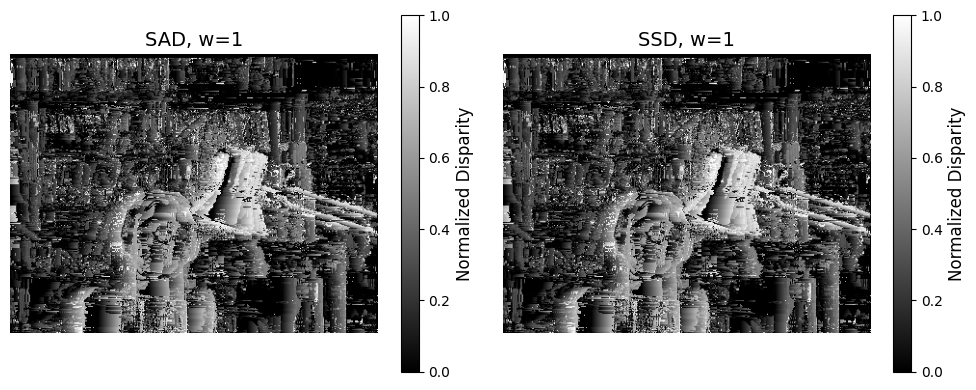

In [14]:
model = BlockMatching(window_size = 1)
model.block_matching()

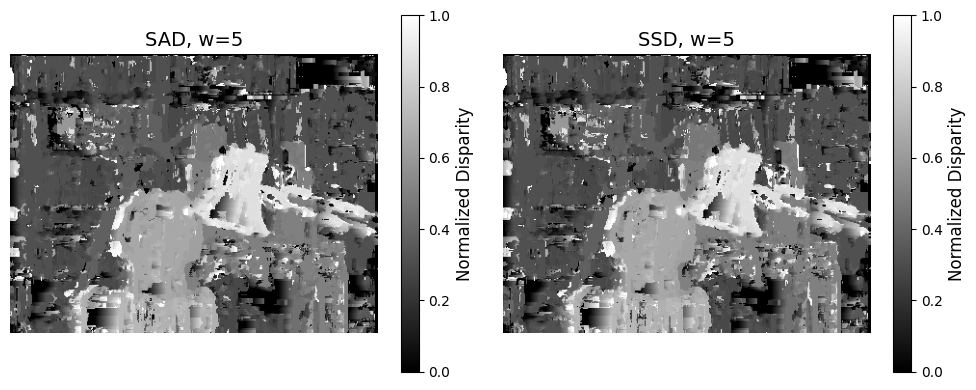

In [15]:
model = BlockMatching(window_size = 5)
model.block_matching()

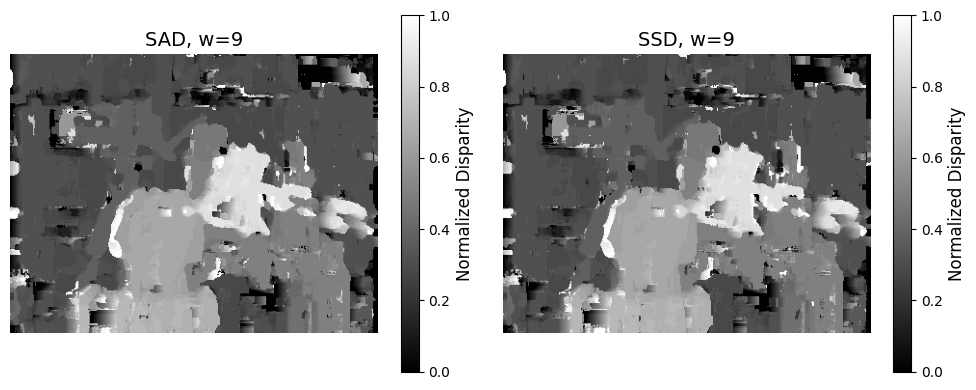

In [ ]:
model = BlockMatching(window_size = 9)
model.block_matching()

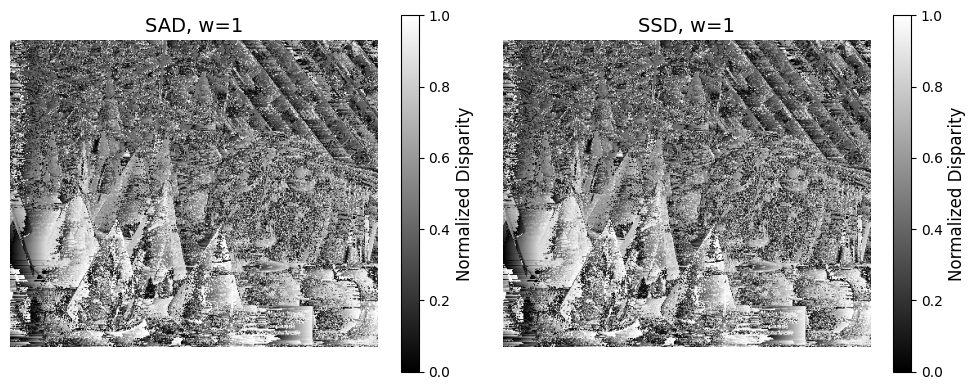

In [30]:
model = BlockMatching(left = "l2.png", right = "r2.png", window_size = 1, max_disparity = 50)
model.block_matching()

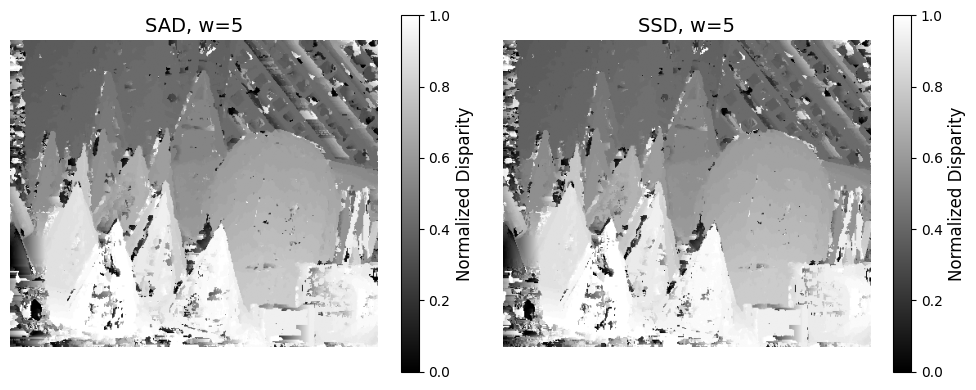

In [29]:
model = BlockMatching(left = "l2.png", right = "r2.png", window_size = 5, max_disparity = 50)
model.block_matching()

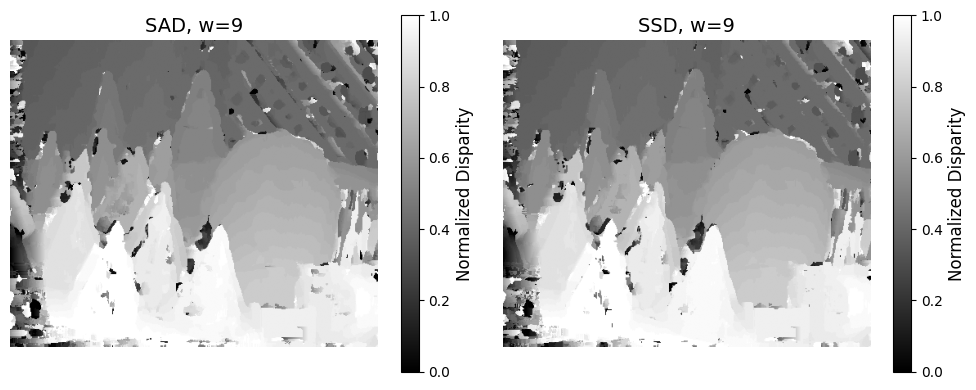

In [ ]:
model = BlockMatching(left = "l2.png", right = "r2.png", window_size = 9, max_disparity = 50)
model.block_matching()

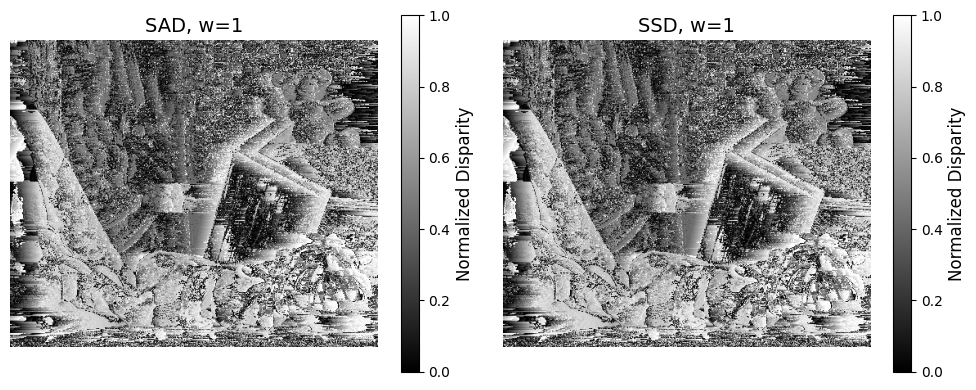

In [28]:
model = BlockMatching(left = "l3.png", right = "r3.png", window_size = 1, max_disparity = 40)
model.block_matching()

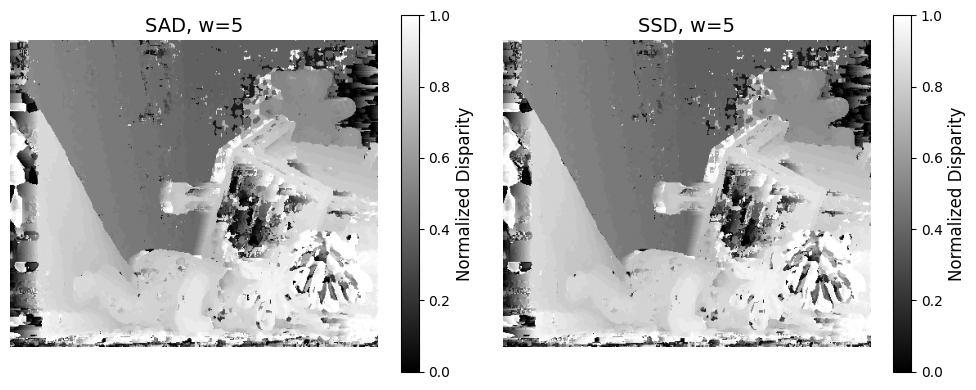

In [27]:
model = BlockMatching(left = "l3.png", right = "r3.png", window_size = 5, max_disparity = 40)
model.block_matching()

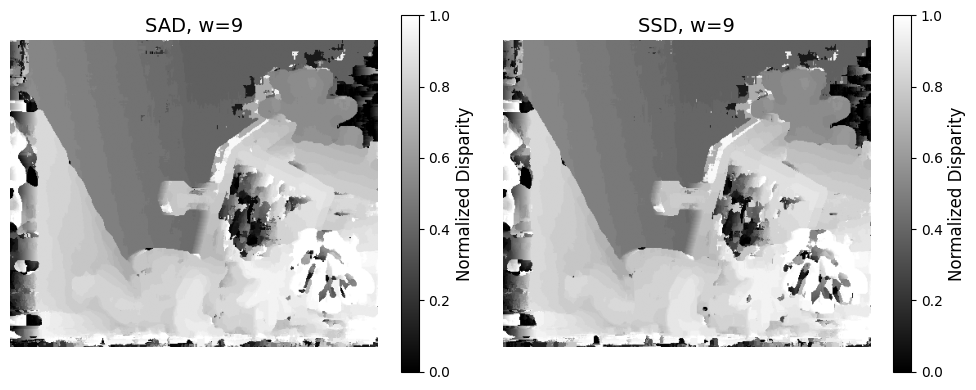

In [26]:
model = BlockMatching(left = "l3.png", right = "r3.png", window_size = 9, max_disparity = 40)
model.block_matching()